In [17]:
import numpy as np
import os
import utils
import params
import matplotlib.pyplot as plt

from sklearn.neighbors import BallTree
from scipy.spatial.distance import cosine

In [3]:
def getIDfromTXT(fichero):
    id = int(fichero.split('\\')[-1].split('.')[0])
    return id

In [4]:
def getIDfromIMG(fichero):
    id = int(fichero.split('_')[-1].split('.')[0])
    return id

In [87]:
DATABASE_PATH = params.CNN_PCA_DESCRIPTORS_TRAIN_PATH

In [88]:
ficheros = utils.getFiles(DATABASE_PATH)
arrays = utils.loadNumpyArrays(ficheros)

In [89]:
tree = BallTree(arrays,leaf_size=40, metric=cosine)

In [90]:
QUERY = utils.loadArray(ficheros[1])

In [91]:
dist, idxs = tree.query(QUERY, k = 10)

In [92]:
idxs

array([[    1, 72196, 63435, 48446,  2953, 64344, 44191, 79113, 74528,
        38459]], dtype=int64)

In [93]:
selected_images = np.asarray(ficheros)[idxs[0]]

In [94]:
selected_images

array(['C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000000025.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000507329.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000445528.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000340345.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000021061.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000452341.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000311583.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000556622.npy',
       'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\TRAIN\\\\PCA_COCO_train2014_000000523795.npy',
 

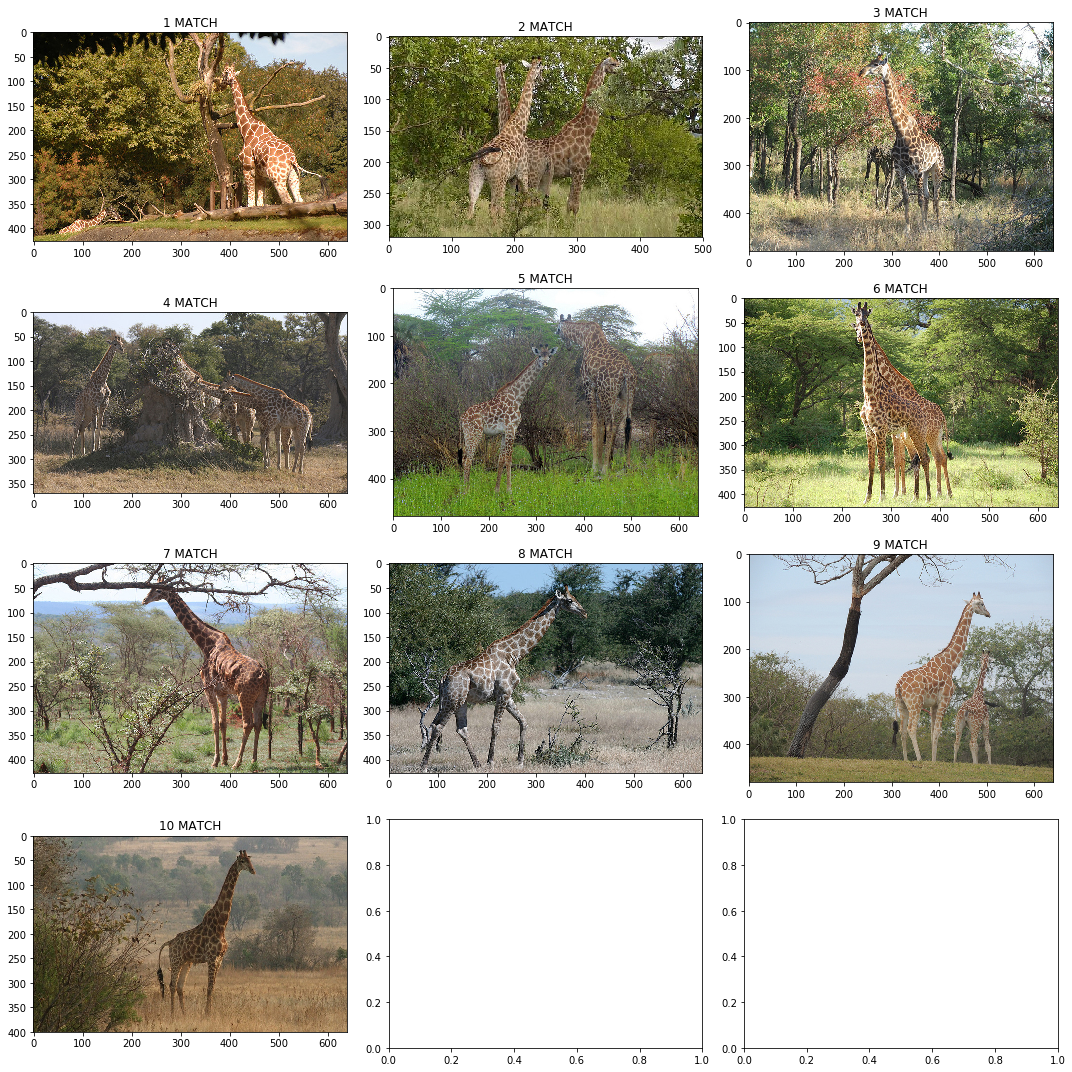

In [95]:
f, ax = plt.subplots(int(10/3) + 1, 3,figsize = (15,15))
#f.suptitle('QUERY: {}'.format(query), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images):
    path = params.TRAIN_IMAGES_PATH + os.path.basename(image).split('.')[0][4:]+'.jpg'
    img = plt.imread(path)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()